# tutorials

* https://www.tutorialspoint.com/python_pillow/python_pillow_quick_guide.htm
* https://pillow.readthedocs.io/en/stable/handbook/tutorial.html#image-sequences
* https://pillow.readthedocs.io/en/stable/reference/Image.html

# size or shape, and display in jupyter

* [h, w, c] = np.shape(img)  
* img.size: [w, h], 注意两者区别。
* img.show() VS builtin display()

# convert image to ndarray

# 默认读取为RGB，mode

* image_PIL_RGB = Image.open(file_path)
* print(im.format, im.size, im.mode)
PPM (512, 512) RGB
    * If the image was not read from a file, it is set to None.

# RGB 2 BGR

* cv2.cvtColor(rgb_np_img, cv2.COLOR_RGB2BGR)

# RGBA 2 RGB

## png webp

* 四通道变三通道
```python
image_PIL_RGB = Image.open(file_path)
image_PIL_RGB = image_PIL_RGB.convert('RGB')
```

# ndarray to Image

* Image.fromarray(img_enhanced)

In [34]:
from PIL import Image
import numpy as np

image_file = "./1.JPEG"
image  = Image.open(image_file)
print(f"{type(image)}, (W, H)={image.size}, {type(image.size)}")


# display in jupyter
# display(image)

# list(image.getdata())

# convert image to ndarray
print(np.asarray(image)[:, :, 0])

print(np.asarray(image.convert("RGBA"))[:, :, 0])


from PIL import Image
import numpy as np

path_to_image = 'path_to_image.png'

image_PIL_RGB = Image.open(path_to_image)
image_np_RGB = np.array(image_PIL_RGB)

image_np_BGR = np.flip(image_np_RGB ,-1)
image_PIL_BGR = Image.fromarray(image_np_BGR)

<class 'PIL.JpegImagePlugin.JpegImageFile'>, (W, H)=(640, 395), <class 'tuple'>
[[106 107 108 ...  86  86  92]
 [106 107 109 ...  72  66  63]
 [107 108 109 ...  64  44  29]
 ...
 [ 24  34  39 ...  61  59  57]
 [ 24  31  32 ...  52  57  59]
 [ 32  36  33 ...  42  52  59]]
[[109 110 111 ...  94  93  99]
 [109 110 112 ...  80  73  70]
 [110 111 112 ...  72  51  36]
 ...
 [ 24  34  39 ...  61  59  57]
 [ 24  31  32 ...  52  57  59]
 [ 32  36  33 ...  42  52  59]]


# crop

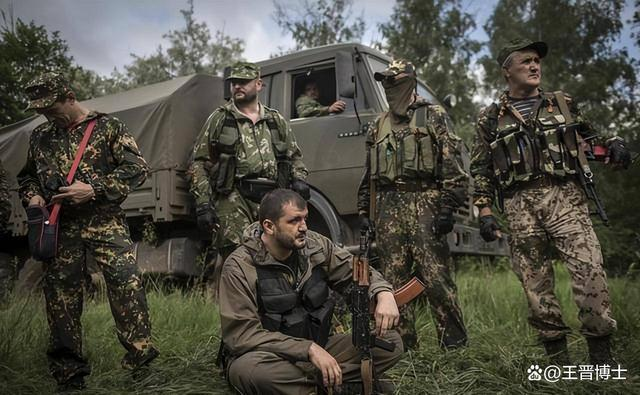

height is too large, img_croped size=(640, 361), y_margin=17


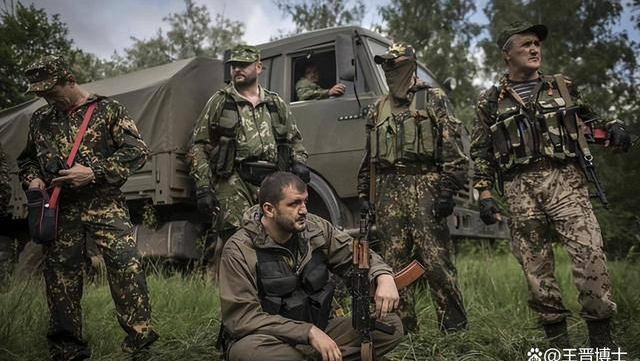

height is too large, img_croped size=(640, 361), y_margin=17


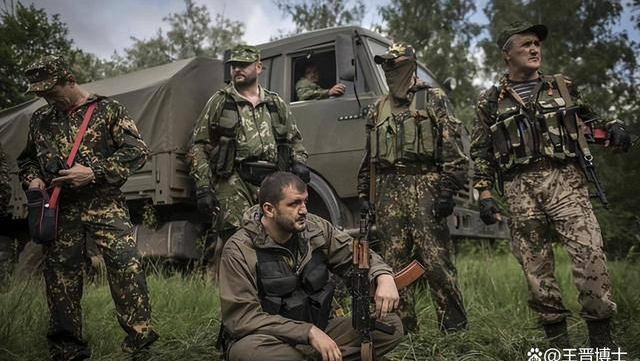

array([[[114, 117, 126],
        [120, 123, 132],
        [120, 123, 132],
        ...,
        [ 30,  36,  34],
        [ 40,  46,  44],
        [ 56,  62,  60]],

       [[116, 119, 128],
        [119, 122, 131],
        [127, 130, 139],
        ...,
        [ 49,  57,  59],
        [ 41,  49,  51],
        [ 45,  54,  53]],

       [[119, 122, 131],
        [117, 120, 129],
        [130, 133, 142],
        ...,
        [ 56,  63,  69],
        [ 39,  47,  50],
        [ 35,  43,  46]],

       ...,

       [[ 35,  37,  23],
        [ 32,  34,  20],
        [ 27,  29,  15],
        ...,
        [ 78,  82,  65],
        [ 47,  51,  34],
        [ 21,  25,   8]],

       [[ 31,  33,  19],
        [ 27,  29,  15],
        [ 26,  28,  14],
        ...,
        [100, 103,  86],
        [ 87,  90,  73],
        [ 71,  74,  57]],

       [[ 32,  34,  20],
        [ 32,  34,  20],
        [ 32,  34,  20],
        ...,
        [ 96,  99,  82],
        [ 81,  84,  67],
        [ 66,  69,  52]]

In [36]:
from PIL import Image
import math

image_file = "./1.JPEG"
image  = Image.open(image_file)

# get top center
width, height = image.size
# left, upper, right, and lower pixel

x_margin: int = 10
y_margin: int = 30

# img_croped = image.crop((x_margin, y_margin, width - x_margin, math.floor(height - y_margin)))

display(image)

# 竖版h360 * w640
# w 太大
if width/height > 640/360:
    x_margin = math.floor((width - height * 640/360 )/2)
    y_margin = 0
    img_croped = image.crop((x_margin, y_margin, width - x_margin, height - y_margin))
    print(f"width is too large, img_croped size={img_croped.size}, x_margin={x_margin}")
else:
    # h 太大
    x_margin = 0
    y_margin = math.floor((height - width/640 * 360)/2)

    img_croped = image.crop((x_margin, y_margin, width - x_margin, height - y_margin))
    print(f"height is too large, img_croped size={img_croped.size}, y_margin={y_margin}")
display(img_croped)


def process_image(file_name, video_type='shorts', strategy='crop'): 
    """_summary_

    Args:
        file_name (_type_): _description_
        video_type (str, optional): _description_. Defaults to 'shorts'.
        strategy (str, optional): _description_. Defaults to 'pad'. 'pad', 'crop': 

    Returns:
        _type_: RGB ndarray croped
    """
    from PIL import Image
    import math
    
    width_type, height_type = (640, 360) if video_type=='desktop' else (360, 640)

    file_name = "./1.JPEG"
    image  = Image.open(file_name)

    # get top center
    width, height = image.size

    if width/height > width_type/height_type:
        x_margin = math.floor((width - height * width_type/height_type )/2)
        y_margin = 0
        img_croped = image.crop((x_margin, y_margin, width - x_margin, height - y_margin))
        print(f"width is too large, img_croped size={img_croped.size}, x_margin={x_margin}")
    else:
        # h 太大
        x_margin = 0
        y_margin = math.floor((height - width/width_type * height_type)/2)

        img_croped = image.crop((x_margin, y_margin, width - x_margin, height - y_margin))
        print(f"height is too large, img_croped size={img_croped.size}, y_margin={y_margin}")
    display(img_croped)
    return np.asanyarray(img_croped)

img_ndarray = process_image('./0.JPG', video_type="desktop")

# merge

* mode "F" is used, which corresponds to an image with 32-bit floating-point pixels. You can convert this to a simpler grayscale image with 8-bit pixels if you wish:
* square_img = square_img.convert("L")

In [2]:
import numpy as np
from PIL import Image

red = np.zeros((600, 600))
green = np.zeros((600, 600))
blue = np.zeros((600, 600))
red[150:350, 150:350] = 255
green[200:400, 200:400] = 255
blue[250:450, 250:450] = 255

red_img = Image.fromarray(red).convert("L")
green_img = Image.fromarray(green).convert("L")
blue_img = Image.fromarray((blue)).convert("L")

square_img = Image.merge("RGB", (red_img, green_img, blue_img))
print(square_img)
square_img.show()

<PIL.Image.Image image mode=RGB size=600x600 at 0x21B68978DF0>


In [4]:
# Merging images

from PIL import Image, ImageDraw


def merge(im1, im2):
    w = im1.size[0] + im2.size[0]
    h = max(im1.size[1], im2.size[1])
    im = Image.new("RGBA", (w, h))

    im.paste(im1)
    im.paste(im2, (im1.size[0], 0))

    return im

In [10]:
## draw 中文

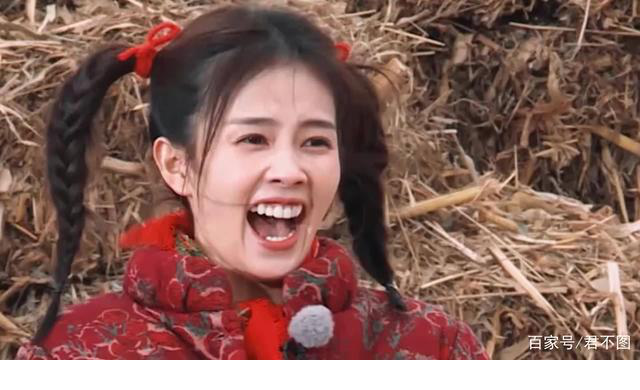

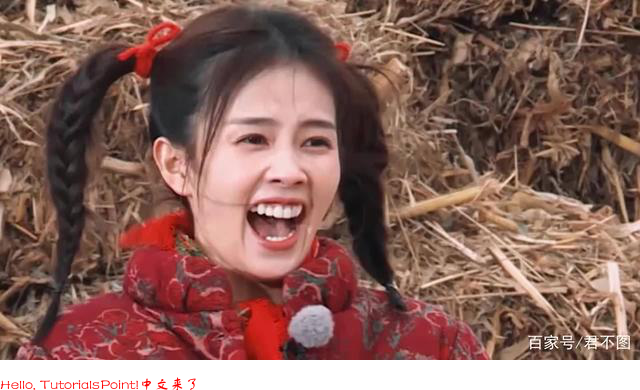

In [9]:
# 
img_origin_pil = Image.open("../images/3.jpg")
height = 30
w, h = img_origin_pil.size

img_background_pil = Image.new("RGBA", (w, h+height))

img_background_pil.paste(img_origin_pil)

display(img_background_pil)

from PIL import ImageFont

font = ImageFont.truetype(font="/d/code/text2video/open-chat-video-editor/fonts/FZSTK.TTF", size=15)

d1 = ImageDraw.Draw(img_background_pil)
d1.text((0, h + height/2), "Hello, TutorialsPoint!中文来了", fill=(255, 0, 0), align='center', font=font)

display(img_background_pil)

# paste

* Processing a subrectangle, and pasting it back

  * region = region.transpose(Image.Transpose.ROTATE_180)
  * im.paste(region, box)

# image format/mode

In [4]:
from PIL import Image

image = Image.open('1.GIF')

print(image.format)

print(image.mode) # 'RGB'

GIF
P


# convert to JPEG

In [ ]:
import os, sys
from PIL import Image

for infile in sys.argv[1:]:
    f, e = os.path.splitext(infile)
    outfile = f + ".jpg"
    if infile != outfile:
        try:
            with Image.open(infile) as im:
                im.save(outfile)
        except OSError:
            print("cannot convert", infile)

In [10]:
from PIL import Image
from pathlib import Path

file_name = "D:/wps/剪印/auto_generate/news/ee6b742a62ef401a82f1ece2ef29d060-风声｜高校微信支付费率上涨风波：为什么微信“知难而/fe3a3e89859bb5fe2ea30733d9ce86ff.WEBP"
img = Image.open(file_name)

input_path = Path(file_name)
input_dir_path = input_path.parent
print(type(input_dir_path))
output_path = input_dir_path.joinpath(input_path.stem + ".jpg")

img.save(output_path, format='JPEG')


<class 'pathlib.WindowsPath'>


# gif save

## creating animation
* https://realpython.com/image-processing-with-the-python-pillow-library/

In [3]:
import numpy as np
from PIL import Image

square_animation = []
for offset in range(0, 100, 2):
     red = np.zeros((600, 600))
     green = np.zeros((600, 600))
     blue = np.zeros((600, 600))
     red[101 + offset : 301 + offset, 101 + offset : 301 + offset] = 255
     green[200:400, 200:400] = 255
     blue[299 - offset : 499 - offset, 299 - offset : 499 - offset] = 255
     red_img = Image.fromarray(red).convert("L")
     green_img = Image.fromarray(green).convert("L")
     blue_img = Image.fromarray((blue)).convert("L")
     square_animation.append(
         Image.merge(
             "RGB",
             (red_img, green_img, blue_img)
         )
     )

square_animation[0].save(
     "animation.gif", save_all=True, append_images=square_animation[1:]
 )

## read a frame in gif

In [ ]:
from PIL import Image

with Image.open("animation.gif") as im:
    im.seek(1)  # skip to the second frame

    try:
        while 1:
            im.seek(im.tell() + 1)
            # do something to im
    except EOFError:
        pass  # end of sequence

In [7]:
from PIL import Image, ImageSequence

im = Image.open("animation.gif")

index = 1
for frame in ImageSequence.Iterator(im):
    frame.save("frame%d.png" % index)
    index += 1
    break

# blur

# thumbnail

# create watermark

# writing text

*chinese characters: has to specify font of Chinese

In [ ]:
from PIL import Image, ImageDraw

img = Image.open("1.JPEG")
d1 = ImageDraw.Draw(img)
d1.text((28, 36), "Hello, TutorialsPoint!", fill=(255, 0, 0))
img.show()
# img.save("images/image_text.jpg")

font = ImageFont.truetype(font="/d/code/text2video/open-chat-video-editor/fonts/FZSTK.TTF", size=15)

d1 = ImageDraw.Draw(img_background_pil)
d1.text((0, h + height/2), "Hello, TutorialsPoint!中文来了", fill=(255, 0, 0), align='center', font=font)

# Geometrical transforms

## resize and rotate

In [ ]:
out = im.resize((128, 128))
out = im.rotate(45) # degrees counter-clockwise

<class 'modelscope.pipelines.cv.image_inpainting_pipeline.ImageInpaintingPipeline'>


## transpose

In [5]:
out = im.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
out = im.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
out = im.transpose(Image.Transpose.ROTATE_90)
out = im.transpose(Image.Transpose.ROTATE_180)
out = im.transpose(Image.Transpose.ROTATE_270)

0

# color transforms

In [ ]:

from PIL import Image

with Image.open("hopper.ppm") as im:
    im = im.convert("L")

# Enhancement

## contrast enhancement, more Brightness, Sharpness

In [ ]:
from PIL import ImageEnhance

enh = ImageEnhance.Contrast(im)
enh.enhance(1.3).show("30% more contrast")

# modes

* https://pillow.readthedocs.io/en/stable/handbook/concepts.html
* 
1 (1-bit pixels, black and white, stored with one pixel per byte)

L (8-bit pixels, grayscale)

P (8-bit pixels, mapped to any other mode using a color palette)

RGB (3x8-bit pixels, true color)

RGBA (4x8-bit pixels, true color with transparency mask)

CMYK (4x8-bit pixels, color separation)

YCbCr (3x8-bit pixels, color video format)

Note that this refers to the JPEG, and not the ITU-R BT.2020, standard

LAB (3x8-bit pixels, the L*a*b color space)

HSV (3x8-bit pixels, Hue, Saturation, Value color space)

Hue’s range of 0-255 is a scaled version of 0 degrees <= Hue < 360 degrees

I (32-bit signed integer pixels)

F (32-bit floating point pixels)